## A markovian reliability evaluation of SDN-enabled IoT networks for mMTC in offshore wind farms

In [1]:
!pip install scipy

In [2]:
#Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

C:\Users\Mwang002\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:2441: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


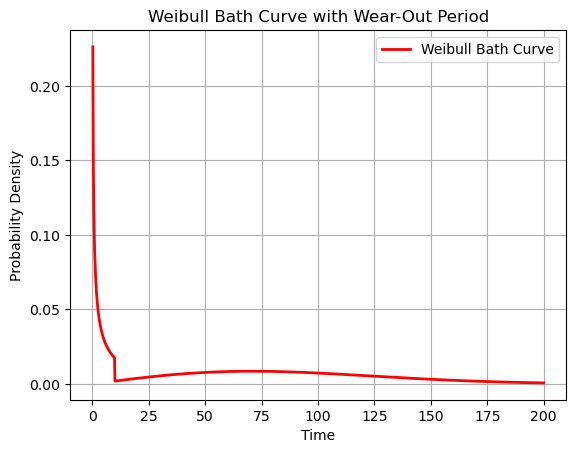

In [3]:
# Define the parameters of the Weibull distribution for the normal life period
shape_normal = 2.0  # Shape parameter for normal life
scale_normal = 100  # Scale parameter for normal life

# Define the parameters for the wear-out period
shape_wear_out = 0.5  # Shape parameter for wear-out
scale_wear_out = 20   # Scale parameter for wear-out
duration_wear_out = 50  # Duration of the wear-out period

# Generate a range of x values for the entire curve
x = np.linspace(0, 200, 1000)

# Calculate the probability density function (PDF) of the Weibull distribution for the normal life period
pdf_normal = weibull_min.pdf(x, shape_normal, loc=0, scale=scale_normal)

# Calculate the PDF of the Weibull distribution for the wear-out period
pdf_wear_out = weibull_min.pdf(x[:duration_wear_out], shape_wear_out, loc=0, scale=scale_wear_out)

# Combine the two PDFs to create the complete Weibull bath curve
pdf_combined = np.concatenate((pdf_wear_out, pdf_normal[duration_wear_out:]))

# Plot the Weibull bath curve
plt.plot(x, pdf_combined, 'r-', lw=2, label='Weibull Bath Curve')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.title('Weibull Bath Curve with Wear-Out Period')
plt.grid()
plt.legend()
plt.show()



In [4]:
!pip install reliability

In [5]:
#To create a weibull distribution with 20 random samples with a 2-parameter Weibull distribution. the fitting process generates the probability plot
from reliability.Distributions import Weibull_Distribution, Lognormal_Distribution, Exponential_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt
import numpy as np

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 40/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha        0.973002       0.0338806  0.908813   1.04173
     Beta         4.79754         0.58739   3.77399   6.09868 

Goodness of fit    Value
 Log-likelihood  6.09989
           AICc -7.87546
            BIC -4.82203
             AD 0.567891 



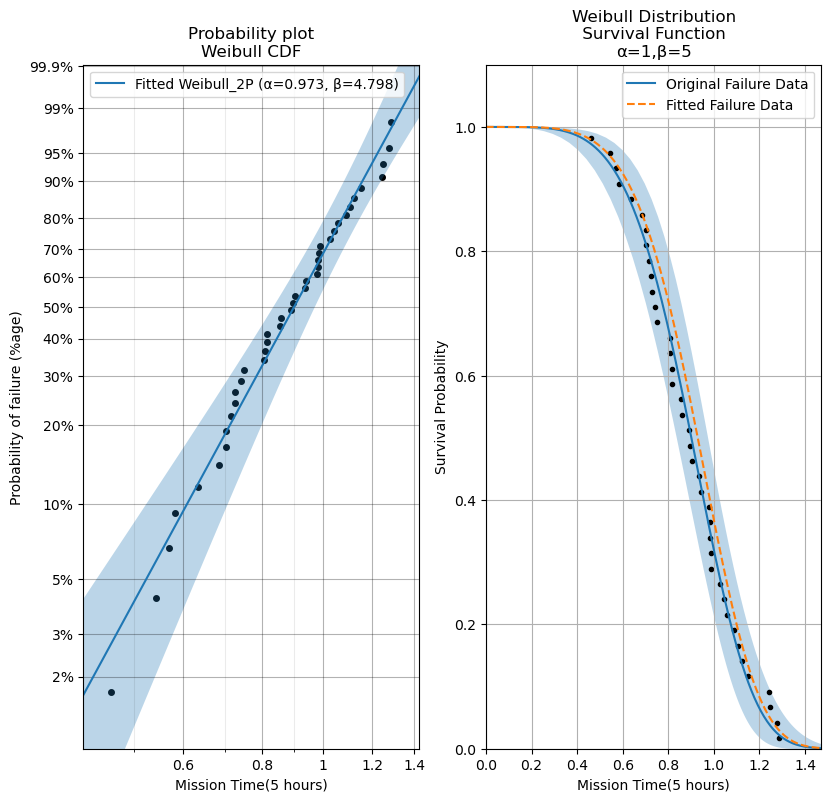

In [25]:
dist = Weibull_Distribution(alpha=1,beta=5)
data = dist.random_samples(40,seed=42)
plt.subplot(121)
fit = Fit_Weibull_2P(failures=data)
plt.xlabel('Mission Time(5 hours)')
plt.ylabel('Probability of failure (%age)')
plt.subplot(122)
fit.distribution.SF(label='Original Failure Data')
dist.SF(label='Fitted Failure Data',linestyle='--')
plot_points(failures=data,func='SF')
plt.xlabel('Mission Time(5 hours)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid()
plt.show()


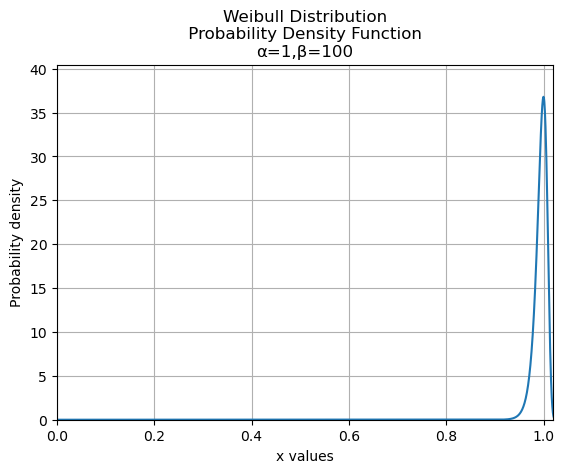

In [26]:
#Example 1: Creating a Weibull distribution with alpha=50 and beta=2
dist = Weibull_Distribution(alpha=1,beta=100)  
dist.PDF()   #creates the PDF plot
plt.grid()
plt.show()

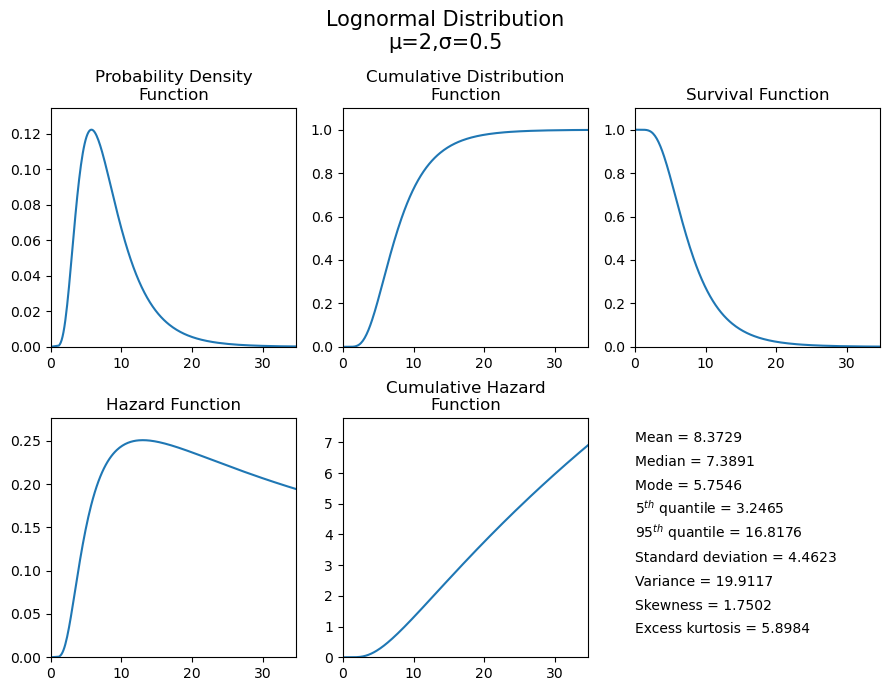

In [17]:
#Example 2: Plotting other function characteristics such as CDF,SF,CHF,and HF
dist=Lognormal_Distribution(mu=2,sigma=0.5)
dist.plot()


In [9]:
#Example 3: To find the value of the SF at X=20
dist = Weibull_Distribution(alpha=50,beta=2)
sf = dist.SF(20)
print("The value of the SF at 20 is", round(sf*100,2),'%')

The value of the SF at 20 is 85.21 %


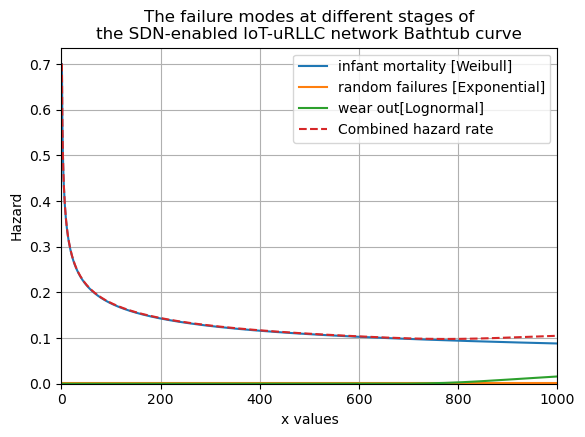

In [18]:
#Example 4: Creating a bathtub curve and layering several distributions
xvals = np.linspace(0,1000,1000)
infant_mortality = Weibull_Distribution(alpha=1,beta=0.7).HF(xvals=xvals,label = 'infant mortality [Weibull]')
random_failures = Exponential_Distribution(Lambda=0.001).HF(xvals=xvals,label= 'random failures [Exponential]')
wear_out = Lognormal_Distribution(mu=6.8,sigma=0.1).HF(xvals=xvals,label='wear out[Lognormal]')
combined = infant_mortality + random_failures + wear_out

plt.plot(xvals,combined,linestyle='--',label='Combined hazard rate')
plt.legend()
plt.title('The failure modes at different stages of\nthe SDN-enabled IoT-uRLLC network Bathtub curve')
plt.xlim(0,1000)
plt.ylim(bottom=0)
plt.grid()
plt.show()

### EXAMPLE 1

Steady-state probabilities: [0.10335742 0.08988167 0.10715234 0.05446729 0.18404865 0.12848832
 0.0961235  0.08866859 0.1244736 ]
MTTR: -0.80
MTTF: 1.08
MTBF: 0.28


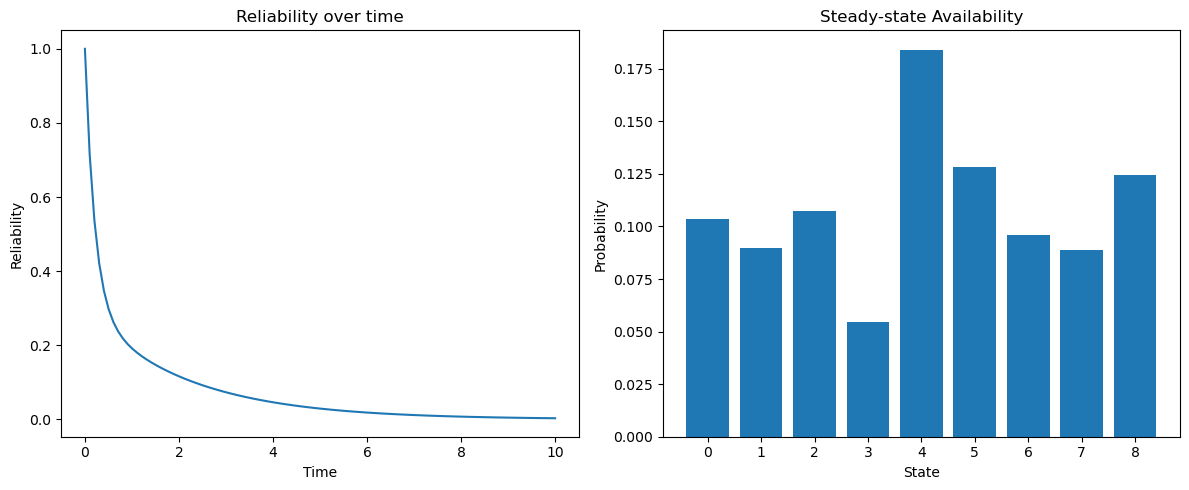

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Generate a 9x9 Q-matrix with 3 working states, 1 failed state, and 5 degraded states
def generate_q_matrix(size=9):
    Q = np.random.rand(size, size)
    for i in range(size):
        Q[i, i] = -np.sum(Q[i, :])
    return Q

# Compute the reliability over time
def reliability(t, P, Q):
    return np.dot(P, Q)

# Compute the steady-state availability
def steady_state_availability(Q):
    size = len(Q)
    A = np.vstack((Q.T, np.ones(size)))
    b = np.append(np.zeros(size), 1)
    pi = np.linalg.lstsq(A, b, rcond=None)[0]
    return pi

# Plot reliability and availability over time
def plot_results(t, sol, pi):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(t, sol[:, 0:3].sum(axis=1))
    plt.title("Reliability over time")
    plt.xlabel("Time")
    plt.ylabel("Reliability")

    plt.subplot(1, 2, 2)
    plt.bar(range(len(pi)), pi)
    plt.title("Steady-state Availability")
    plt.xlabel("State")
    plt.ylabel("Probability")
    plt.xticks(range(len(pi)))

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Parameters
    Q = generate_q_matrix()
    P0 = np.array([1] + [0]*8)  # Assuming starting in state 1

    # Compute reliability
    t_span = (0, 10)
    t_eval = np.linspace(*t_span, 100)
    sol = solve_ivp(reliability, t_span, P0, args=(Q,), t_eval=t_eval, method="RK45")

    # Compute steady-state availability
    pi = steady_state_availability(Q)
    print("Steady-state probabilities:", pi)

    # Compute MTTR and MTTF
    MTTR = 1 / (-Q[3, 0:3].sum())  # Assuming state 4 as the failed state
    MTTF = 1 / Q[0:3, 3].sum()
    MTBF = MTTF + MTTR

    print(f"MTTR: {MTTR:.2f}")
    print(f"MTTF: {MTTF:.2f}")
    print(f"MTBF: {MTBF:.2f}")

    # Plot results
    plot_results(t_eval, sol.y.T, pi)

if __name__ == "__main__":
    main()


In [12]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import expm

# Define the transition rate matrix Q for the CTMC
Q = np.array([
    [-1.8, 0, 0, 0, 0.9, 0, 0.9, 0, 0],
    [0.02, -0.92, 0, 0, 0.9, 0, 0, 0, 0],
    [0.02, 0, -0.87, 0, 0, 0, 0, 0, 0],
    [0.07, 0, 0, -0.07, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, -0.08778, 0.02778, 0, 0, 0.02778],
    [0.89, 0.02778, 0, 0, 0, -0.02778, 0, 0, 0],
    [0, 0, 0.00285, 0, 0, 0, -0.06285, 0.06, 0],
    [0.89, 0, 0, 0, 0, 0, 0, -0.89, 0],
    [0, 0.95, 0, 0.0057, 0, 0, 0, 0, -0.0057]
])

# Define the initial probability vector
p0 = np.zeros(Q.shape[0])
p0[0] = 1  # System starts in the first "up" state

# Define the function to compute the derivatives of the probabilities
def dPdt(t, p, Q):
    return Q.T @ p

# Solve the system of differential equations
t_max = 100  # Define the maximum time
t_eval = np.linspace(0, t_max, 1000)  # More points for a smoother reliability curve
solution = solve_ivp(dPdt, [0, t_max], p0, args=(Q,), t_eval=t_eval)

# Extract the solution for probabilities
probabilities = solution.y

# Calculate reliability by summing the probabilities of being in "working" states
reliability = np.sum(probabilities[0:3, :], axis=0)

# Calculate availability by summing the probabilities of being in "working" or "degraded" states
availability = np.sum(probabilities[0:8, :], axis=0)  # Exclude the "failed" state

# Calculate MTTF using the inverse of the exit rate from the "up" state
# This is a simplification and a more accurate method might be needed for complex systems
exit_rate = -Q[0,0]  # Rate of leaving the first "up" state
MTTF = 1 / exit_rate

# MTTR (Mean Time To Repair) would be the inverse of the rate at which repairs happen
# Assuming that the repair rate is the negative of the diagonal "failed" state
repair_rate = -Q[3,3]  # Rate of leaving the "failed" state
MTTR = 1 / repair_rate

# MTBF (Mean Time Between Failures) is the sum of MTTF and MTTR
MTBF = MTTF + MTTR

# Print results at the last time point
print(f"Reliability at {t_max} hours: {reliability[-1]}")
print(f"Availability at {t_max} hours: {availability[-1]}")
print(f"MTTF: {MTTF} hours")
print(f"MTTR: {MTTR} hours")
print(f"MTBF: {MTBF} hours")


Reliability at 100 hours: 83840.98223898798
Availability at 100 hours: 592535.0738789832
MTTF: 0.5555555555555556 hours
MTTR: 14.285714285714285 hours
MTBF: 14.84126984126984 hours


In [23]:
(1.4/5)*100


27.999999999999996

In [2]:
import numpy as np

# Assuming you have a NumPy array called 'data' with three columns
# where data[:, 0] represents the current state,
# data[:, 1] represents the next state,
# and data[:, 2] represents the transition probability.

# Replace this with your actual data
data = np.array([
    [0, 0, 0.2],
    [0, 1, 0.8],
    [1, 0, 0.4],
    [1, 1, 0.6],
])

# Find the number of unique states
num_states = int(max(np.max(data[:, 0]), np.max(data[:, 1])) + 1)

# Create an empty transition matrix
transition_matrix = np.zeros((num_states, num_states))

# Fill the transition matrix based on the data
for row in data:
    current_state, next_state, transition_prob = row
    transition_matrix[int(current_state), int(next_state)] = transition_prob

print("Transition Matrix:")
print(transition_matrix)


Transition Matrix:
[[0.2 0.8]
 [0.4 0.6]]


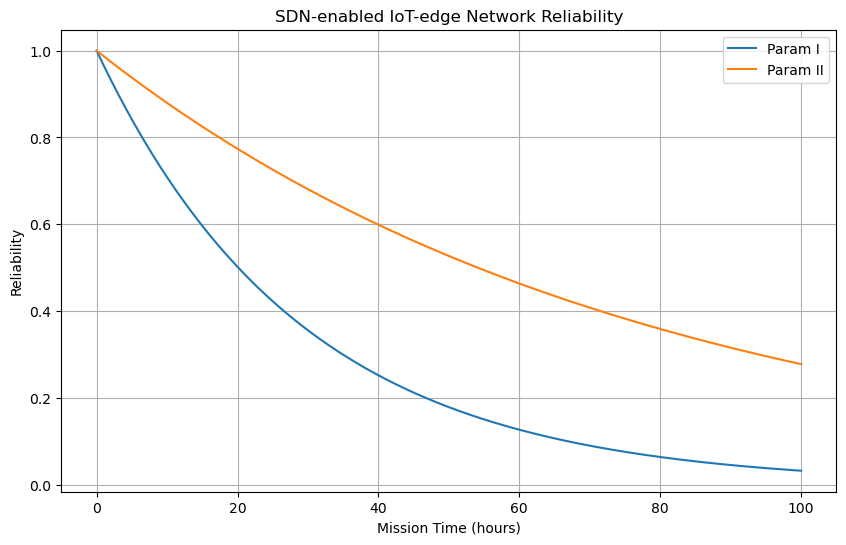

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def reliability_curve(time, first_failure_time):
    return np.exp(-(time / first_failure_time))

# Set the mission time (x-axis)
mission_time = np.linspace(0, 100, 1000)

# Set the first failure times for the two curves
first_failure_time_1 = 29
first_failure_time_2 = 78

# Calculate reliability for each curve
reliability_curve_1 = reliability_curve(mission_time, first_failure_time_1)
reliability_curve_2 = reliability_curve(mission_time, first_failure_time_2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mission_time, reliability_curve_1, label='Param I')
plt.plot(mission_time, reliability_curve_2, label='Param II')

plt.title('SDN-enabled IoT-edge Network Reliability')
plt.xlabel('Mission Time (hours)')
plt.ylabel('Reliability')
plt.legend()
plt.grid(True)
plt.show()
